In [1]:
# Load the 'Employee Productivity and Satisfaction HR Data' dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('hr_dashboard_data.csv')

# 1. Satisfaction by Salary Range

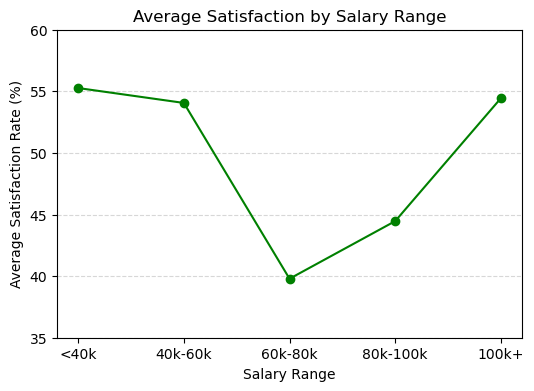

In [2]:
# Line Plot: Average Satisfaction by Salary Range
salary_bins = [0, 40000, 60000, 80000, 100000, float('inf')]
salary_labels = ['<40k','40k-60k','60k-80k','80k-100k','100k+']
df['Salary Range'] = pd.cut(df['Salary'], bins=salary_bins, labels=salary_labels)
sal_sat = df.groupby('Salary Range')['Satisfaction Rate (%)'].mean()

plt.figure(figsize=(6,4))
plt.plot(sal_sat.index, sal_sat.values, marker='o', color='green')
plt.title('Average Satisfaction by Salary Range')
plt.xlabel('Salary Range')
plt.ylabel('Average Satisfaction Rate (%)')
plt.ylim(35, 60)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [3]:
df.groupby('Salary Range')[['Satisfaction Rate (%)']].mean()

,Satisfaction Rate (%)
Salary Range,
<40k,55.266667
40k-60k,54.057143
60k-80k,39.787879
80k-100k,44.465116
100k+,54.440678


Interpretation: The relationship between salary and satisfaction is not linear. In fact, the lowest salary group (<40k) has a relatively high average satisfaction (55.3%). Satisfaction then slightly drops for the 40k–60k group (54.1%), and reaches a minimum in the 60k–80k range (39.8% – a notable dip). However, as salaries increase further, satisfaction climbs back up: the 80k–100k range averages about 44.5%, and the 100k+ group jumps to 54.4%, nearly as high as the lowest-paid group. This forms a V-shaped pattern where mid-level salaries correspond to the lowest satisfaction. One interpretation is that employees in mid-level earnings (often mid-career, mid-level positions) might feel pressure or discontent (possibly expecting higher pay or facing life/career challenges), whereas those earning very high salaries may enjoy perks and security that boost satisfaction, and those with very low salaries might be younger employees with optimistic outlooks or lower expectations. This finding suggests that simply increasing pay does not linearly increase satisfaction – other factors (job role, growth opportunities, work-life balance) likely play substantial roles, especially for the middle salary brackets.

# 2.  Productivity by Salary Range

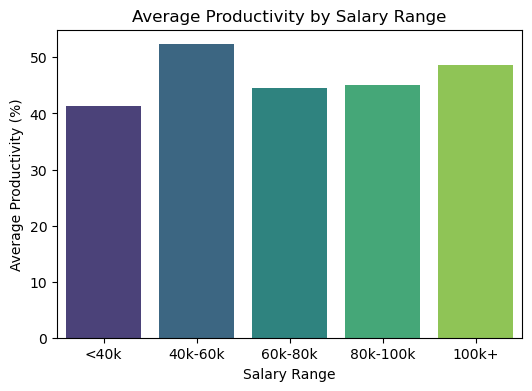

In [5]:
# Bar Chart: Average Productivity by Salary Range
sal_prod_mean = df.groupby('Salary Range')['Productivity (%)'].mean()
sal_prod_std = df.groupby('Salary Range')['Productivity (%)'].std()

plt.figure(figsize=(6,4))
sns.barplot(x=sal_prod_mean.index, y=sal_prod_mean.values, palette='viridis', ci=None)
plt.title('Average Productivity by Salary Range')
plt.xlabel('Salary Range')
plt.ylabel('Average Productivity (%)')
plt.show()

In [6]:
df.groupby('Salary Range')[['Productivity (%)']].mean()

,Productivity (%)
Salary Range,
<40k,41.333333
40k-60k,52.314286
60k-80k,44.545455
80k-100k,45.023256
100k+,48.711864


In [7]:
df.groupby('Salary Range')[['Productivity (%)']].std()

,Productivity (%)
Salary Range,
<40k,31.924840
40k-60k,28.591207
60k-80k,27.093693
80k-100k,28.236660
100k+,27.907514


Interpretation: Productivity does not steadily rise with salary either. The 40k–60k salary group has the highest average productivity (52.3%). This mid-level salary bracket likely includes many technical contributors (e.g., junior developers) who are highly productive. The lowest salary group (<40k, likely interns and entry-level roles) has lower productivity (41.3%). Interestingly, the highest salary group (100k+) has a moderate productivity (48.7%), not the highest despite their experience and senior roles – possibly because these roles involve more strategic tasks not captured fully by a raw productivity metric. Salary ranges 60k–80k and 80k–100k show slightly lower productivity (mid-40s). The error bars indicate considerable variability within each bracket, overlapping substantially. Together with insight 10, we see a scenario where mid-level earners are working hardest (highest output) but not the happiest, whereas the highest earners have good-not-great productivity but high satisfaction. This could reflect that mid-level employees push themselves for career advancement (boosting productivity at the expense of satisfaction), while top earners might have reached a plateau where they don’t need to overextend to maintain their status.

# 3. Relationship between Salary and Experience

In [8]:
df['Experience'] = df['Joining Date'].str.split('-').apply(lambda x: x[1]).astype('int')
df['Experience'] = df['Experience'].apply(lambda x: 2023 - (x + 2000) if x <= 23 else 2023 - (x+1900))

In [9]:
df

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,Salary Range,Experience
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596,60k-80k,3
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540,100k+,24
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292,60k-80k,6
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303,<40k,1
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133,100k+,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Stephanie Fisher,29,Female,9,32,87,3.5,HR,Junior Developer,Jan-19,50051,40k-60k,4
196,Jeremy Miller,26,Male,7,45,28,2.8,IT,Junior Developer,Jan-21,46612,40k-60k,2
197,Daniel Pierce,22,Male,3,36,77,1.6,Finance,Intern,Jan-21,32992,<40k,2
198,Michael Hernandez,36,Female,23,96,50,3.4,Marketing,Manager,Jan-05,104216,100k+,18


<AxesSubplot:title={'center':'Experience vs. Salary'}, xlabel='Experience', ylabel='Salary'>

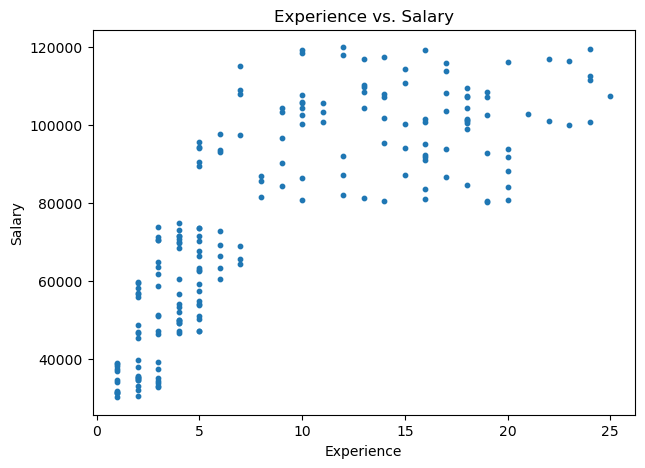

In [10]:
df.plot.scatter(x='Experience', y='Salary', title = 'Experience vs. Salary', figsize=(7,5), s=10)

In [11]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(df['Salary'], df['Experience'])
print(f"Correlation: {corr}, P-value: {p_value}")

Correlation: 0.7890826231131435, P-value: 8.957019194427373e-44


Interpretation: The scatter plot demonstrates a positive correlation of 0.78 between years of experience and salary. As you would expect, experience plays a significant role in influencing salary growth. A higher trend in salary outcomes for more experienced individuals due to their expertise, acquiring more advanced skills, and job responsibilities/role in the workforce.

# 4. Relationship between Productivity, Age and Salary by Position

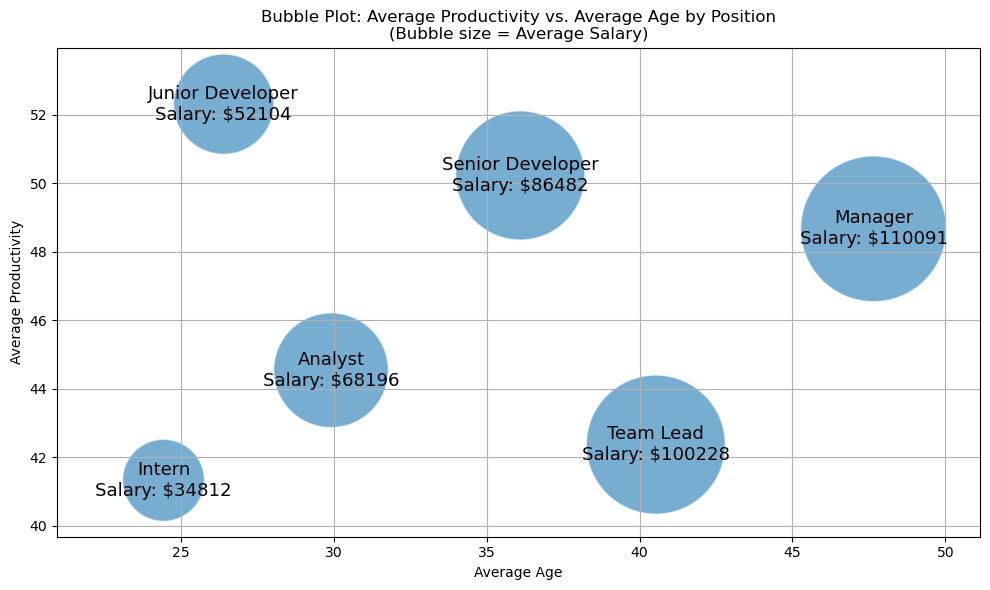

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

In [14]:
from IPython.display import display
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]  # Adjust the size
plt.rcParams['figure.autolayout'] = True  # Avoid clipping



import pandas as pd
import matplotlib.pyplot as plt


# Load the dataset (update the file path if needed)
# df = pd.read_csv('employee_data.csv')
# Group by 'Position' and calculate mean values for Age, Productivity, and Salary
agg_df = df.groupby('Position').agg({
    'Age': 'mean',
    'Productivity (%)': 'mean',
    'Salary': 'mean'
}).reset_index()
# Optional: Set a scale factor for bubble sizes (adjust as needed)
scale_factor = 0.1  # Adjust this value based on your salary magnitude
plt.figure(figsize=(10, 6))
plt.scatter(agg_df['Age'], agg_df['Productivity (%)'],
            s=agg_df['Salary'] * scale_factor,
            alpha=0.6, edgecolors='w')
# Add text labels for each position
for i, row in agg_df.iterrows():
    label = f"{row['Position']}\nSalary: ${row['Salary']:.0f}"
    plt.text(row['Age'], row['Productivity (%)'], label,
             ha='center', va='center', fontsize=13, color='black')
# Calculate the axis limits with extra padding to ensure bubbles are not cut off
x_min, x_max = agg_df['Age'].min(), agg_df['Age'].max()
y_min, y_max = agg_df['Productivity (%)'].min(), agg_df['Productivity (%)'].max()
# Adding 15% padding to each axis
padding_x = (x_max - x_min) * 0.15
padding_y = (y_max - y_min) * 0.15
plt.xlim(x_min - padding_x, x_max + padding_x)
plt.ylim(y_min - padding_y, y_max + padding_y)
plt.xlabel('Average Age')
plt.ylabel('Average Productivity')
plt.title('Bubble Plot: Average Productivity vs. Average Age by Position\n(Bubble size = Average Salary)')
plt.grid(True)
plt.show()
# Display the figure output in the notebook
display(plt.gcf())  # Ensures full-size display without scrolling

In [15]:
agg_df

,Position,Age,Productivity (%),Salary
0,Analyst,29.909091,44.545455,68195.696970
1,Intern,24.433333,41.333333,34811.500000
2,Junior Developer,26.400000,52.314286,52104.114286
3,Manager,47.650000,48.675000,110091.475000
4,Senior Developer,36.100000,50.233333,86481.500000
5,Team Lead,40.531250,42.375000,100228.062500


Interpretation: The bubble chart shows the average salary within the different job positions and observing the relationship between average age and average productivity. Junior Developers top the productivity rate within the other job roles and are among the youngest group at age 26 with a low rank mean salary at 52K. Senior Developers have the second highest productivity rate with mean age 36 compensating about 86k. As observed, age is playing a role in salary growth. It could be due to the number of years in the workforce or comparable experience in job roles. Managers with a mean age at 47 have the third highest productivity rate while also the largest compensation group at 110k. However, productivity is not a metric for salary growth because Team Leads are making about 110k with productivity rate at 42%, almost matching Interns’ productivity at 41% but Interns making about 34k. Keeping in mind, Interns are a young group at 24 and Team Leads are a mature group at 40, which marks the salary difference due to level of experience.

# 5. Correlation Between Projects Completed, Age, Experience and Salary

In [16]:
# Calculate the correlation of Age, Experience, Projects Completed with 'Salary'
correlations = df.corr()['Salary'].sort_values(ascending=False)

# Display the features most correlated with 'Salary'
top_correlations = correlations[1:4]
print(top_correlations)

Projects Completed    0.874329
Age                   0.834550
Experience            0.789083
Name: Salary, dtype: float64


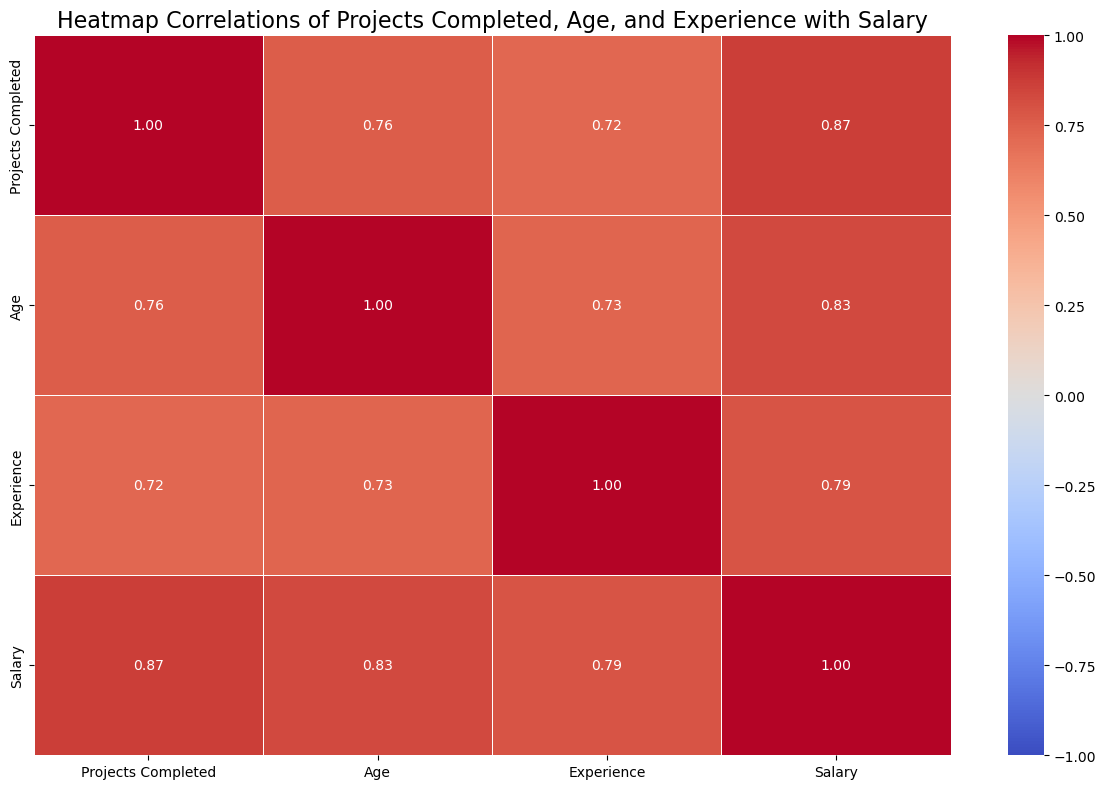

In [17]:
# Select the correlated features including Salary
selected_features = list(top_correlations.index) + ['Salary']

# Compute the correlations for the selected features
correlation_matrix = df[selected_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f", vmin=-1, vmax=1)

# Title
plt.title("Heatmap Correlations of Projects Completed, Age, and Experience with Salary", fontsize=16)

# Show the heatmap
plt.show()

Interpretation: In this heatmap, it shows the correlation of salary with three significant features which are experience, age and Project Completed. Project completed have the highest correlation of 0.87 followed by Age correlation of 0.83 and then Experience correlation of 0.79. This concludes to say employees should focus on completing projects efficiently and effectively to earn higher compensation. It also shows age and years of experience work parallel in earning salary growth. To keep in mind, promoting to manager role is necessary for higher salary. Hence, completing a higher number of projects, gaining a higher number of experience and promoting to roles like Team Leads or Managers are influential on acquiring higher compensations in the workforce.   

# 6. High-Satisfaction but Low-Productivity Employees

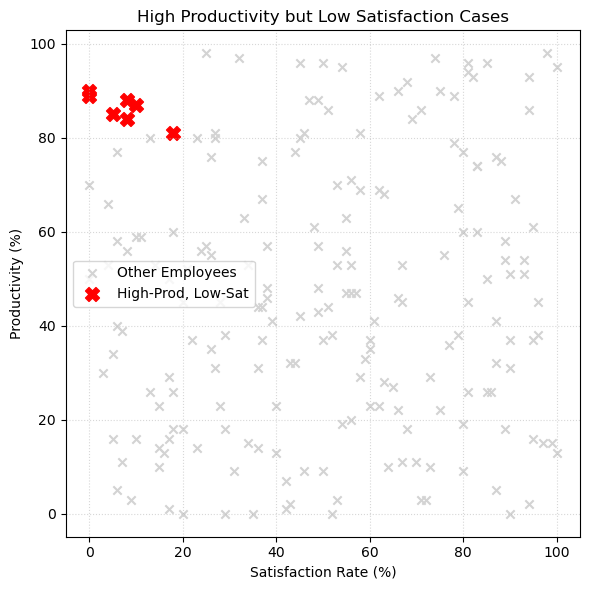

In [18]:
# Highlight high productivity, low satisfaction cases
high_prod_low_sat = df[(df['Productivity (%)']>80) & (df['Satisfaction Rate (%)']<20)]
plt.figure(figsize=(6,6))
plt.scatter(df['Satisfaction Rate (%)'], df['Productivity (%)'], color='lightgray', marker='x', label='Other Employees')
plt.scatter(high_prod_low_sat['Satisfaction Rate (%)'], high_prod_low_sat['Productivity (%)'], 
            color='red', marker='X', s=100, label='High-Prod, Low-Sat')
plt.title('High Productivity but Low Satisfaction Cases')
plt.xlabel('Satisfaction Rate (%)')
plt.ylabel('Productivity (%)')
plt.legend(loc='center left')
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

In [19]:
high_prod_low_sat

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,Salary Range,Experience
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292,60k-80k,6
14,Angela Davis,29,Male,18,88,8,1.8,Sales,Senior Developer,Jan-18,89571,80k-100k,5
80,Sarah Fernandez,57,Female,23,84,8,1.9,HR,Manager,Jan-06,115901,100k+,17
87,Jerry Mccoy,44,Male,17,89,0,2.1,IT,Senior Developer,Jan-03,93702,80k-100k,20
99,Mary Barber,39,Female,24,81,18,4.1,Finance,Manager,Jan-16,108820,100k+,7
183,Russell Newton,27,Male,3,85,5,4.4,IT,Junior Developer,Jan-20,51135,40k-60k,3
190,Joseph Friedman,35,Male,18,90,0,3.7,Finance,Team Lead,Jan-13,105640,100k+,10


Interpretation: The plot highlights a handful of red X markers in the upper-left quadrant – these represent employees who are excelling in productivity (80-90% range) but have extremely low satisfaction. In our dataset, 7 employees fall in this category. They come from various departments (IT, Sales, HR, Finance) and include roles like Analysts, Team Leads, and Senior Developers. These individuals are likely at high risk of burnout or turnover: they deliver strong results but are unhappy in their jobs. It’s crucial for management to recognize and address such cases – perhaps through discussions about workload, recognition, or role fit – because losing these high performers could hurt the company. This insight underscores that productivity alone can mask underlying dissatisfaction. Even as these employees succeed on paper, their engagement is low, and interventions might be needed to improve their job satisfaction or redistribute their load.

# 7. High-Performance but Low-Satisfaction Employees (Potential Burnout)

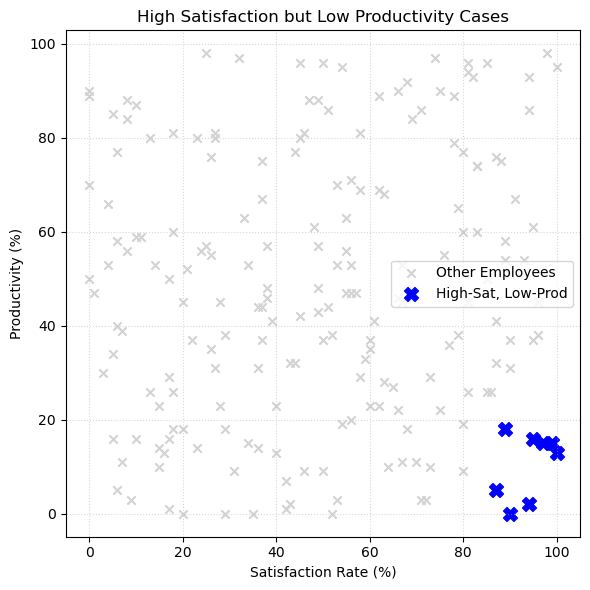

In [20]:
# Highlight high satisfaction, low productivity cases
high_sat_low_prod = df[(df['Satisfaction Rate (%)']>80) & (df['Productivity (%)']<20)]
plt.figure(figsize=(6,6))
plt.scatter(df['Satisfaction Rate (%)'], df['Productivity (%)'], color='lightgray', marker='x', label='Other Employees')
plt.scatter(high_sat_low_prod['Satisfaction Rate (%)'], high_sat_low_prod['Productivity (%)'], 
            color='blue', marker='X', s=100, label='High-Sat, Low-Prod')
plt.title('High Satisfaction but Low Productivity Cases')
plt.xlabel('Satisfaction Rate (%)')
plt.ylabel('Productivity (%)')
plt.legend(loc='center right')
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

In [21]:
high_sat_low_prod

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,Salary Range,Experience
12,Donald Davis,25,Female,2,15,97,1.8,HR,Intern,Jan-21,35169,<40k,2
31,Kim Larson,25,Female,3,15,99,2.8,Marketing,Junior Developer,Jan-19,47322,40k-60k,4
69,Dana Taylor,25,Female,2,16,95,4.0,Sales,Intern,Jan-22,36842,<40k,1
81,Kathryn Scott,42,Female,8,5,87,4.3,Sales,Senior Developer,Jan-09,80567,80k-100k,14
84,Mark Wilson,57,Female,23,2,94,3.7,Sales,Manager,Jan-99,111381,100k+,24
95,Patricia Campos,27,Female,3,18,89,2.6,HR,Junior Developer,Jan-18,54974,40k-60k,5
156,Susan Hill,23,Male,2,0,90,2.7,Marketing,Intern,Jan-20,35130,<40k,3
193,Drew Rojas,39,Female,16,13,100,4.7,IT,Manager,Jan-16,107814,100k+,7


Interpretation: Highlighted with blue X markers in the lower-right region, we find a few employees who report very high satisfaction (90-100%) but have very low productivity. In our data, there are 8 such cases. These could be individuals who are content perhaps due to factors outside day-to-day performance – e.g., they might enjoy their team, have a good work-life balance, or simply have roles where output is not captured by our productivity metric. They might also be coasting or not challenged enough, which is a different kind of concern. While they are not a direct performance problem due to their low output, their happiness means they aren’t likely to leave. However, the company may want to investigate if their low productivity is due to misalignment of skills, lack of assignments, or other barriers. This insight reveals that some employees can be very satisfied even when not contributing much – a scenario of possible complacency or poor performance management.